# INST 414 Final Project - Video Game Genre Classification
#### Jim Chen, Christopher Aguila, Nicholas Koy, Gerald Reyes, Kaveh Vakili

# Exploratory Data Analysis

In [68]:
import pandas as pd
import seaborn as sns

vgsales = pd.read_csv('vgsales.csv')
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [2]:
print(vgsales.shape)

(16598, 11)


In [3]:
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [4]:
vgsales.nunique()

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

### Missing Values
year: 271 missing

publisher: 58 missing

The missing years and publishers may be problematic so these rows with missing values will be removed

In [5]:
vgsales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
vgsales = vgsales.dropna()

### Correlation
we want to avoid strong collinearity between independent variables as they would be hard to weight in the predictor
All the sales seem highly correlated, so we will just use global_sales as the only sales predictor and also rank and year because there is no collinearity problem.


In [7]:
corr = vgsales.corr()

<AxesSubplot:>

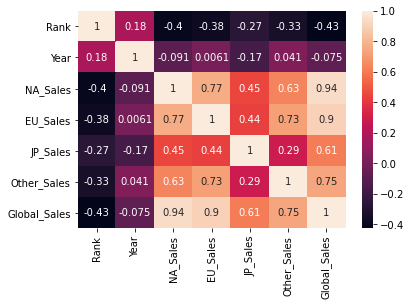

In [8]:
sns.heatmap(corr, annot=True)

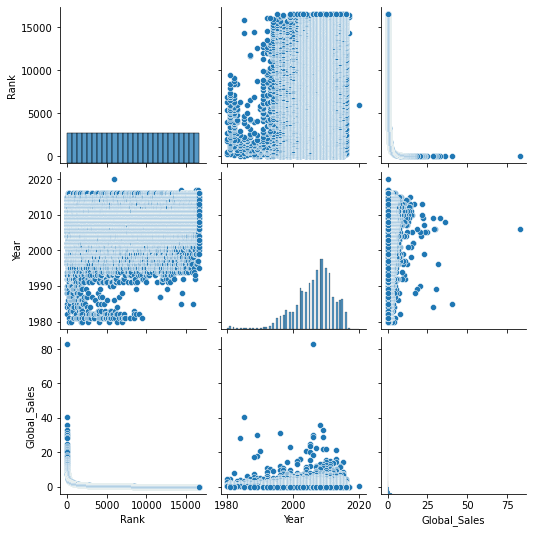

In [9]:
# dropping all sales except - global
# seaborn pairplot is computationally expensive and might take a bit of time
vgsales = vgsales.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)
sns.pairplot(vgsales)

<AxesSubplot:xlabel='Genre'>

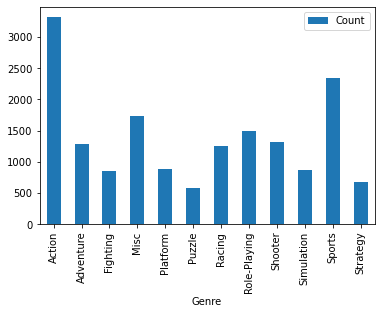

In [69]:
#Distribution of genres

vgsales_genre_counts = vgsales[["Genre", "Rank"]].groupby(["Genre"]).agg("count")
vgsales_genre_counts = vgsales_genre_counts.reset_index()
vgsales_genre_counts.columns = ['Genre', 'Count']
vgsales_genre_counts.plot.bar(x='Genre')

# Classification

## Logistic Regression

Question to be answered with Logistic Regression:  How accurately can a video game’s genre be predicted based on its rank, global sales amount, platform, release date year, and publisher?

In [10]:
#X is the data while y is the target

X = vgsales[['Rank', 'Platform', 'Year', 'Publisher', 'Global_Sales']]
X_encoded = pd.get_dummies(X, columns=['Platform', 'Year', 'Publisher'])

y = vgsales['Genre']

print(X_encoded)

        Rank  Global_Sales  Platform_2600  Platform_3DO  Platform_3DS  \
0          1         82.74              0             0             0   
1          2         40.24              0             0             0   
2          3         35.82              0             0             0   
3          4         33.00              0             0             0   
4          5         31.37              0             0             0   
...      ...           ...            ...           ...           ...   
16593  16596          0.01              0             0             0   
16594  16597          0.01              0             0             0   
16595  16598          0.01              0             0             0   
16596  16599          0.01              0             0             0   
16597  16600          0.01              0             0             0   

       Platform_DC  Platform_DS  Platform_GB  Platform_GBA  Platform_GC  ...  \
0                0            0            

In [11]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.30, random_state = 0)

In [13]:
LogReg = LogisticRegression()

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

C:\Users\Cyber\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
print('Classes', LogReg.classes_)
print('Intercept', LogReg.intercept_)
print("Coefficients", LogReg.coef_ )

Classes ['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']
Intercept [ 1.70085468  0.15924446 -0.62189485  0.70567391 -0.3321898  -1.6578516
 -0.0115315   0.25766427  0.28258477 -0.54162859  0.79829293 -0.73921866]
Coefficients [[-0.04763581  0.06081919  0.31755877 ... -0.02104385  0.
  -0.02346151]
 [ 0.40561294 -0.18887183 -0.17177477 ... -0.00722758  0.
  -0.01441699]
 [-0.28915186  0.07547211 -0.12400585 ... -0.00093783  0.
  -0.0048448 ]
 ...
 [-0.12881433 -0.00096142 -0.32610248 ... -0.00687174  0.
  -0.00394984]
 [ 0.05659854  0.04317268  0.24293187 ... -0.00814357  0.
   0.10815525]
 [ 0.0637179  -0.48536767 -0.07710143 ... -0.01039718  0.
  -0.00430212]]


In [15]:
print("Accuracy", LogReg.score(X_test, y_test))
print(classification_report(y_test, LogReg.predict(X_test)))

Accuracy 0.354746317512275
              precision    recall  f1-score   support

      Action       0.37      0.56      0.44       976
   Adventure       0.51      0.33      0.40       380
    Fighting       0.40      0.22      0.28       266
        Misc       0.30      0.27      0.29       518
    Platform       0.30      0.14      0.19       240
      Puzzle       0.26      0.20      0.23       192
      Racing       0.35      0.21      0.26       383
Role-Playing       0.40      0.39      0.39       423
     Shooter       0.25      0.13      0.17       376
  Simulation       0.30      0.24      0.27       251
      Sports       0.36      0.59      0.45       683
    Strategy       0.28      0.17      0.22       200

    accuracy                           0.35      4888
   macro avg       0.34      0.29      0.30      4888
weighted avg       0.35      0.35      0.34      4888



### Findings from Logistic Regression

Genre cannot be accurately predicted with just a video game's rank, global sales amount, platform, release date year, and publisher; our logistic regression was overall 35% accurate. 

One thing to note though is that our logistic regression was able to best predict the Adventure genre; it predicted this genre correctly 51% of the time.  The relatively high accuracy in this genre means this genre does somewhat have a correlation with a video game's rank, global sales amount, platform, release date year, and publisher.

## Decision Trees

Question to be answered with Decision Tree: How accurately can a video game's genre be predicted if the game's rank, name, release date year, publisher, and global sales amount are known?

In [16]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics,preprocessing
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus
%matplotlib inline

In [17]:
def characters_to_numb(*args):
    for arg in args:
        vgsales[arg] = pd.Categorical(vgsales[arg])
        vgsales[arg] = vgsales[arg].cat.codes
    return vgsales

In [18]:
characters_to_numb("Name","Publisher","Platform", "Genre")

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,10849,26,2006.0,10,359,82.74
1,2,9201,11,1985.0,4,359,40.24
2,3,5493,26,2008.0,6,359,35.82
3,4,10851,26,2009.0,10,359,33.00
4,5,7247,5,1996.0,7,359,31.37
...,...,...,...,...,...,...,...
16593,16596,10942,6,2002.0,4,269,0.01
16594,16597,5713,7,2003.0,8,241,0.01
16595,16598,8039,16,2008.0,6,21,0.01
16596,16599,4938,4,2010.0,5,8,0.01


In [19]:
X = vgsales.drop(['Genre'],axis=1)
y=vgsales['Genre']

In [20]:
vgsales_test=vgsales.sample(n=20)
x_test=vgsales_test.drop(['Genre'],axis=1)
y_test=vgsales_test['Genre']
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size=0.2,random_state=99)

In [21]:
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [22]:
round(RF.score(X_test, y_test), 4)

0.2145

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree,export_text

In [30]:
vgsales = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

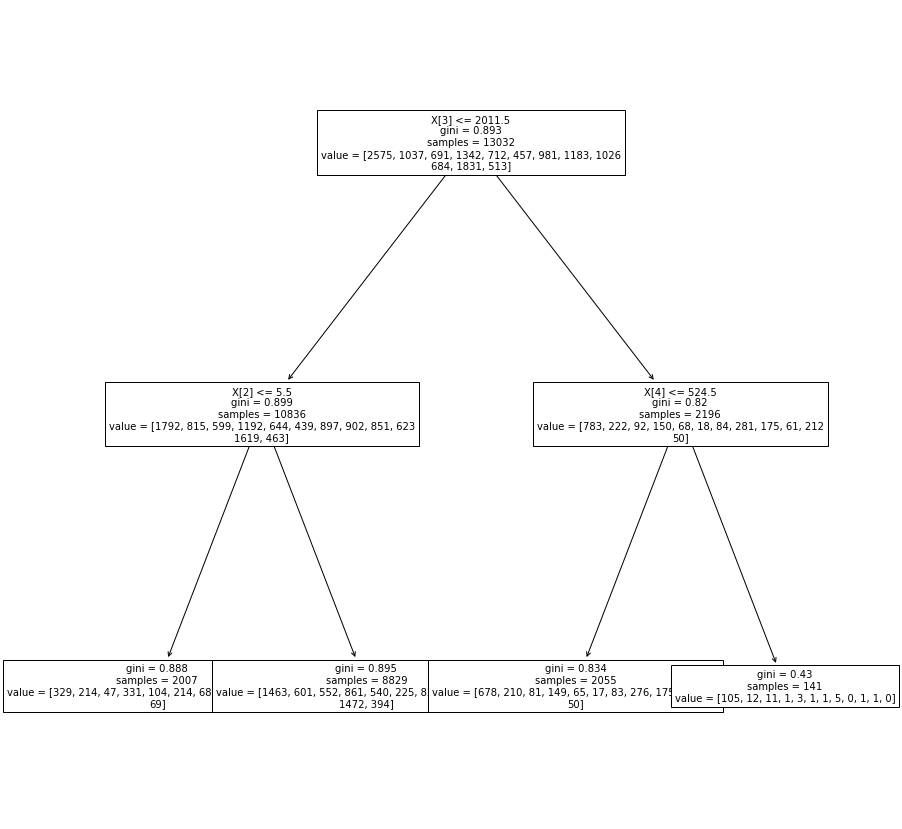

In [31]:
vgsales.fit(X_train, y_train)
plt.figure(figsize=(15,15))
tree.plot_tree(vgsales, fontsize = 10);
plt.show()

### Findings from Decision Tree

The results showed that there is a 21% accuracy in the model created. The tree holds 7 leaves with 6 branches. The process of was difficult in actaully plotting the tree itself given we had trouble fitting from the Random Forest Classifier.

The columns our decision tree model used to create branches are “Year”, “Platform”, and “Publisher”

## XGBoost

Question to answer with XGBoost: How accurately can a XGBoost model predict a video game's genre when the video game's rank, global sales amount, platform, release date year, and publisher are known?

Which feature is most important in predicting a video game’s genre?

Which feature is least important in predicting a video game’s genre?

In [32]:
#Making a copy of our data since we need to transform it

vgsalesBoost = pd.read_csv('vgsales.csv')
vgsalesBoost = vgsalesBoost.dropna()
vgsalesBoost = vgsalesBoost.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)

In [33]:
# One-Hot Encoding to transform categorical variables
vgsalesBoost = vgsalesBoost.drop("Name", axis = 1).copy() # not in-place
# splitting our features and our target
X = vgsalesBoost.drop("Genre", axis = 1).copy()
y = vgsalesBoost["Genre"].copy()

In [34]:
X_encoded = pd.get_dummies(X, columns=['Platform', 'Year', 'Publisher'])
X_encoded.head()

,Rank,Global_Sales,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
0,1,82.74,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,40.24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,35.82,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,33.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,31.37,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
y.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [36]:
from sklearn.preprocessing import LabelEncoder
Ly = LabelEncoder()
y = Ly.fit_transform(y)

In [37]:
Ly.classes_

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [38]:
Ly.inverse_transform([2])

array(['Fighting'], dtype=object)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=0)

In [40]:
X_train.shape
X_test.shape

(4073, 648)

In [41]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_model.fit(X_train, y_train)

C:\Users\Cyber\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:37] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [42]:
Yp = xgb_model.predict(X_test)

In [43]:
# % percentage correct
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Yp) * 100

35.452983059170144

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

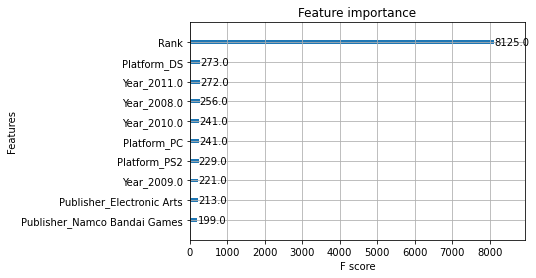

In [44]:
from xgboost import plot_importance
plot_importance(xgb_model, max_num_features = 10)

### Findings from XGBoost

Genre cannot be accurately predicted with just a video game's rank, global sales amount, platform, release date year, and publisher; our XGBoost model was overall 35% accurate.

The most important feature in predicting a video game's genre in our XGBoost model is Rank; all other features appear to have relatively low importance.

## Neural Network (Keras)

Question to be answered with a keras neural network:  What is the highest accuracy that a video game's genre can be predicted when the game's rank, name, platform, release year, publisher, and global sales amount are known?

What is the highest accuracy a keras neural network can reach when predicting a video game's genre based on the game's rank, name, platform, release year, publisher, and global sales amount?

What is the lowest accuracy a keras neural network can reach when predicting a video game's genre based on the game's rank, name, platform, release year, publisher, and global sales amount?

Is there a major change in accuracy between epochs?

In [45]:
#Making a copy of our data since we need to transform it

vgsalesNN = pd.read_csv('vgsales.csv')
vgsalesNN = vgsalesNN.dropna()
vgsalesNN = vgsalesNN.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)

In [46]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
model = Sequential()
model.add(Dense(units =5, activation = 'relu')) # 5 inputs
model.add(Dense(units = 12, activation = 'sigmoid')) #12 different genres

In [47]:
def characters_to_numb(*args):
    for arg in args:
        vgsalesNN[arg] = pd.Categorical(vgsalesNN[arg])
        vgsalesNN[arg] = vgsalesNN[arg].cat.codes
    return vgsalesNN

# transform specific column data to integers 
characters_to_numb("Name","Publisher","Platform","Genre")
target_column = ["Genre"]

In [48]:
predictors = list(set(list(vgsalesNN.columns))-set(target_column))

#normalize predictors via scaling
vgsalesNN[predictors].describe()
vgsalesNN[predictors] = vgsalesNN[predictors]/vgsalesNN[predictors].max()

In [49]:
X = vgsalesNN[predictors].values
y = vgsalesNN[target_column].values

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

(11403, 6)
(4888, 6)


In [50]:
count_classes = y_test.shape[1]
print(count_classes)

12


In [51]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [52]:
#fit data
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
357/357 [==============================] - 0s 377us/step - loss: 2.4485 - accuracy: 0.1434
Epoch 2/20
357/357 [==============================] - 0s 366us/step - loss: 2.3744 - accuracy: 0.1434
Epoch 3/20
357/357 [==============================] - 0s 369us/step - loss: 2.3515 - accuracy: 0.1777
Epoch 4/20
357/357 [==============================] - 0s 357us/step - loss: 2.3411 - accuracy: 0.1994
Epoch 5/20
357/357 [==============================] - 0s 347us/step - loss: 2.3336 - accuracy: 0.1993
Epoch 6/20
357/357 [==============================] - 0s 344us/step - loss: 2.3283 - accuracy: 0.1993
Epoch 7/20
357/357 [==============================] - 0s 345us/step - loss: 2.3239 - accuracy: 0.1993
Epoch 8/20
357/357 [==============================] - 0s 346us/step - loss: 2.3206 - accuracy: 0.1993
Epoch 9/20
357/357 [==============================] - 0s 342us/step - loss: 2.3177 - accuracy: 0.1994
Epoch 10/20
357/357 [==============================] - 0s 350us/step - loss: 2.315

### Findings from Neural Network (Keras)

Our neural network model's accuracy peaked at epoch 4 with an accuracy of around 19.94%; our model's accuracy did not change a lot as the epochs progressed.  The lowest accuracy our model had was at epoch 1 with an accuracy of 14.34%

With a keras neural network we cannot accurately predict a video game's genre when the game's rank, name, platform, release year, publisher, and global sales amount are known.

## Neural Network (PyTorch)

Question to be answered a using pyTorch neural network: What is the highest accuracy that a video game's genre can be correctly classified when the game's rank, name, platform, release year, publisher, and global sales amount are known?

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import numpy as np
from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
EPOCHS = 20
BATCH_SIZE = 64
LEARNING_RATE = 0.007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 12

In [71]:
#Making a copy of our data since we need to transform it

vgsalesTorch = pd.read_csv('vgsales.csv')
vgsalesTorch = vgsalesTorch.dropna()
vgsalesTorch = vgsalesTorch.drop(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)

In [72]:
def characters_to_numb(*args):
    for arg in args:
        vgsalesTorch[arg] = pd.Categorical(vgsalesTorch[arg])
        vgsalesTorch[arg] = vgsalesTorch[arg].cat.codes
    return vgsalesTorch

# transform specific column data to integers 
characters_to_numb("Name","Publisher","Platform", "Genre")

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,10849,26,2006.0,10,359,82.74
1,2,9201,11,1985.0,4,359,40.24
2,3,5493,26,2008.0,6,359,35.82
3,4,10851,26,2009.0,10,359,33.00
4,5,7247,5,1996.0,7,359,31.37
...,...,...,...,...,...,...,...
16593,16596,10942,6,2002.0,4,269,0.01
16594,16597,5713,7,2003.0,8,241,0.01
16595,16598,8039,16,2008.0,6,21,0.01
16596,16599,4938,4,2010.0,5,8,0.01


In [73]:
X = vgsalesTorch[['Rank', 'Name', 'Platform', 'Year', 'Publisher', 'Global_Sales']]
y = vgsalesTorch[['Genre']]

# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [74]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [75]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [76]:
def get_class_distribution(obj):
    count_dict = {
        "genre_0": 0,
        "genre_1": 0,
        "genre_2": 0,
        "genre_3": 0,
        "genre_4": 0,
        "genre_5": 0,
        "genre_6": 0,
        "genre_7": 0,
        "genre_8": 0,
        "genre_9": 0,
        "genre_10": 0,
        "genre_11": 0
    }
    
    for i in obj:
        if i == 0: 
            count_dict['genre_0'] += 1
        elif i == 1: 
            count_dict['genre_1'] += 1
        elif i == 2: 
            count_dict['genre_2'] += 1
        elif i == 3: 
            count_dict['genre_3'] += 1
        elif i == 4: 
            count_dict['genre_4'] += 1  
        elif i == 5: 
            count_dict['genre_5'] += 1
        elif i == 6:
            count_dict['genre_6'] += 1   
        elif i == 7:
            count_dict['genre_7'] += 1
        elif i == 8:
            count_dict['genre_8'] += 1
        elif i == 9:
            count_dict['genre_9'] += 1
        elif i == 10:
            count_dict['genre_10'] += 1
        elif i == 11:
            count_dict['genre_11'] += 1           
        else:
            print("Check classes.")
            
    return count_dict

In [77]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

In [78]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([0.0004, 0.0011, 0.0017, 0.0008, 0.0016, 0.0024, 0.0011, 0.0009, 0.0011,
        0.0016, 0.0006, 0.0021])


In [79]:
class_weights_all = class_weights[target_list]

In [80]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [81]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [82]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [83]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [84]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=6, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=12, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [85]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [86]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [87]:
print("Begin training.")
for e in range(1, EPOCHS+1):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), torch.flatten(y_train_batch.to(device))
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), torch.flatten(y_val_batch.to(device))
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')

Begin training.
Epoch 001: | Train Loss: 2.30151 | Val Loss: 2.65506 | Train Acc: 15.478| Val Acc: 12.117
Epoch 002: | Train Loss: 2.24482 | Val Loss: 2.64177 | Train Acc: 17.027| Val Acc: 12.423
Epoch 003: | Train Loss: 2.20995 | Val Loss: 2.62286 | Train Acc: 18.190| Val Acc: 11.810
Epoch 004: | Train Loss: 2.20348 | Val Loss: 2.57897 | Train Acc: 18.821| Val Acc: 12.807
Epoch 005: | Train Loss: 2.17696 | Val Loss: 2.61914 | Train Acc: 19.391| Val Acc: 12.193
Epoch 006: | Train Loss: 2.16486 | Val Loss: 2.62272 | Train Acc: 19.620| Val Acc: 13.267
Epoch 007: | Train Loss: 2.15371 | Val Loss: 2.57049 | Train Acc: 20.185| Val Acc: 13.727
Epoch 008: | Train Loss: 2.14507 | Val Loss: 2.61259 | Train Acc: 20.326| Val Acc: 14.340
Epoch 009: | Train Loss: 2.14652 | Val Loss: 2.57685 | Train Acc: 20.321| Val Acc: 13.880
Epoch 010: | Train Loss: 2.12081 | Val Loss: 2.54846 | Train Acc: 20.549| Val Acc: 13.650
Epoch 011: | Train Loss: 2.11946 | Val Loss: 2.60730 | Train Acc: 21.516| Val Acc: 1

## Findings from Neural Network (PyTorch)
Using Pytorch, the model has an accuracy of ~15%. The accuracy fluctuated after each epoch, with the lowest accuracy recorded at 11.810%. This means that at it's peak, this model cannot accurately classify a video game's genre when the game's rank, name, platform, release year, publisher, and global sales amount are known.